**Exploring Daily Temperature and Humidity Shifts in Malate, Manila**

**DSP MIDTERM PROJECT**


1.   Aquino, John Benedict
2.   De Guzman, Jose Raymundo
3.   Ibarra, Jacky Bruce
4.   Acerado, Keneth


**Analysis Goal.** The goal of project is to explore collected data from sensors whilst applying the concepts
of DSP. Specifically, the project should answer the following questions:


1.   What is the periodicity of the data?
2.   What are the central tendencies of the data according to time of day, day of week, and in general?
3. What patterns arise from the data you are analyzing?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import f_oneway
import seaborn as sns

In [2]:
# Load data from an Excel file using pandas
df = pd.read_excel(r'C:\Users\Akino\Desktop\HumidityTempData.xlsx')
# Display the first few rows of the DataFrame
df.head()

,DateTime,Temperature,Humidity
0,"Monday,-October-23-2023-04:32:12",30.2,80.9
1,"Monday,-October-23-2023-04:47:16",29.9,81.6
2,"Monday,-October-23-2023-05:02:20",30.0,81.7
3,"Monday,-October-23-2023-05:17:24",30.0,81.5
4,"Monday,-October-23-2023-05:32:28",30.2,80.9


In [3]:
# Display information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     647 non-null    object 
 1   Temperature  645 non-null    float64
 2   Humidity     645 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.3+ KB


It can be observed that:


*   The DateTime column data type is object, it has to be converted to DateTime datatype.
*   There are 645 non-null values in the Temperature and Humidity columns, but their are 647 entries which means there are 2 null values in each of these columns.



In [4]:
# Show the total number of nulls
df.isnull().sum()

DateTime       0
Temperature    2
Humidity       2
dtype: int64

This confirms that there are null values in the Temperature and Humidity Columns

In [5]:
# Remove rows with missing (NaN) values from the DataFrame
df = df.dropna()
df.isnull().sum()

DateTime       0
Temperature    0
Humidity       0
dtype: int64

The null values has been removed.

In [6]:
# Convert the 'DateTime' column to a Pandas datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%A,-%B-%d-%Y-%H:%M:%S')

df['DateTime']

0     2023-10-23 04:32:12
1     2023-10-23 04:47:16
2     2023-10-23 05:02:20
3     2023-10-23 05:17:24
4     2023-10-23 05:32:28
              ...        
642   2023-10-29 21:46:00
643   2023-10-29 22:01:04
644   2023-10-29 22:16:08
645   2023-10-29 22:31:12
646   2023-10-29 22:46:16
Name: DateTime, Length: 645, dtype: datetime64[ns]

**Analysis Goal 1: What is the periodicity of the data?**

In [7]:
df['TimeDiff'] = df['DateTime'].diff()

# Analyze the distribution of time intervals
time_intervals = df['TimeDiff'].dt.total_seconds()

mean_time_interval = time_intervals.mean()
std_time_interval = time_intervals.std()

print(f"Mean Time Interval: {mean_time_interval} seconds or {mean_time_interval/60} minutes")
print(f"Standard Deviation of Time Intervals: {std_time_interval} seconds")

Mean Time Interval: 906.9006211180124 seconds or 15.115010351966873 minutes
Standard Deviation of Time Intervals: 71.28072598514845 seconds


 A mean time interval of 906.9 seconds (or 15.12 minutes) indicates the average spacing between data points, and a standard deviation of 71.28 seconds reflects the degree of variability or dispersion around this average spacing.

**Analysis Goal 2: What are the central tendencies of the data according to time of day, day of week, and in general?**

In [8]:
morning_start = pd.to_datetime("06:00:00", format='%H:%M:%S').time()
afternoon_start = pd.to_datetime("12:00:00", format='%H:%M:%S').time()
nighttime_start = pd.to_datetime("18:00:00", format='%H:%M:%S').time()

def categorize_time_of_day(time):
    if morning_start <= time < afternoon_start:
        return "Morning"
    elif afternoon_start <= time < nighttime_start:
        return "Afternoon"
    else:
        return "Nighttime"

df['TimeOfDay'] = df['DateTime'].dt.time.apply(categorize_time_of_day)

# Calculate central tendencies for time of day
time_of_day_stats = df.groupby('TimeOfDay')[['Temperature', 'Humidity']].agg(['mean', 'max','min'])

# Group data by day of the week
df['DayOfWeek'] = df['DateTime'].dt.day_name()

# Define the order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert 'DayOfWeek' to a Categorical data type with the desired order
df['DayOfWeek'] = df['DateTime'].dt.day_name()
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=weekday_order, ordered=True)

# Calculate central tendencies for day of the week
day_of_week_stats = df.groupby('DayOfWeek')[['Temperature', 'Humidity']].agg(['mean', 'max','min'])

# Calculate general statistics
general_stats = df[['Temperature', 'Humidity']].agg(['mean', 'max','min'])

# Display the results
print("Central Tendencies by Time of Day:")
print(time_of_day_stats)
print("\nCentral Tendencies by Day of the Week:")
print(day_of_week_stats)
print("\nGeneral Central Tendencies:")
print(general_stats)

Central Tendencies by Time of Day:
          Temperature               Humidity            
                 mean   max   min       mean   max   min
TimeOfDay                                               
Afternoon   30.795783  33.8  29.9  76.774699  84.3  67.0
Morning     30.761446  33.8  23.6  75.940964  84.8  55.2
Nighttime   30.679553  33.8  24.9  77.123962  84.3  57.5

Central Tendencies by Day of the Week:
          Temperature               Humidity            
                 mean   max   min       mean   max   min
DayOfWeek                                               
Monday      30.596154  30.9  29.8  76.947436  81.7  67.5
Tuesday     30.694792  31.3  29.8  77.970833  84.3  67.5
Wednesday   30.994737  33.8  30.2  77.789474  84.3  75.6
Thursday    30.641667  33.8  23.6  75.537500  81.7  55.2
Friday      30.792473  33.3  29.9  76.456989  84.8  67.0
Saturday    30.651042  33.8  29.9  76.417708  81.7  67.0
Sunday      30.721978  32.9  29.8  75.992308  80.9  67.0

General Cent

General Central Tendencies
*   **mean:** For Temperature, the mean is approximately 30.7305 °C, and for Humidity, it is approximately 76.7296.
*   **min:** For Temperature, the minimum value is 23.6, and for Humidity, it is 55.2. These values represent the lowest temperature and humidity recorded.
*   **max:** This is the maximum value in each column. For Temperature, the maximum value is 33.8, and for Humidity, it is 84.8. These values represent the highest temperature and humidity recorded in the dataset.




**Analysis Goal 3: What patterns arise from the data you are analyzing?**

In [9]:
# Calculate the average daily humidity
average_daily_humi = pd.DataFrame(df.groupby([df["DateTime"].dt.day])["Humidity"].mean())

# Reset the index to make the day column a regular column
average_daily_humi.reset_index(inplace=True)

average_daily_humi

,DateTime,Humidity
0,23,76.947436
1,24,77.970833
2,25,77.789474
3,26,75.537500
4,27,76.456989
5,28,76.417708
6,29,75.992308


Text(0.5, 0, 'Day')

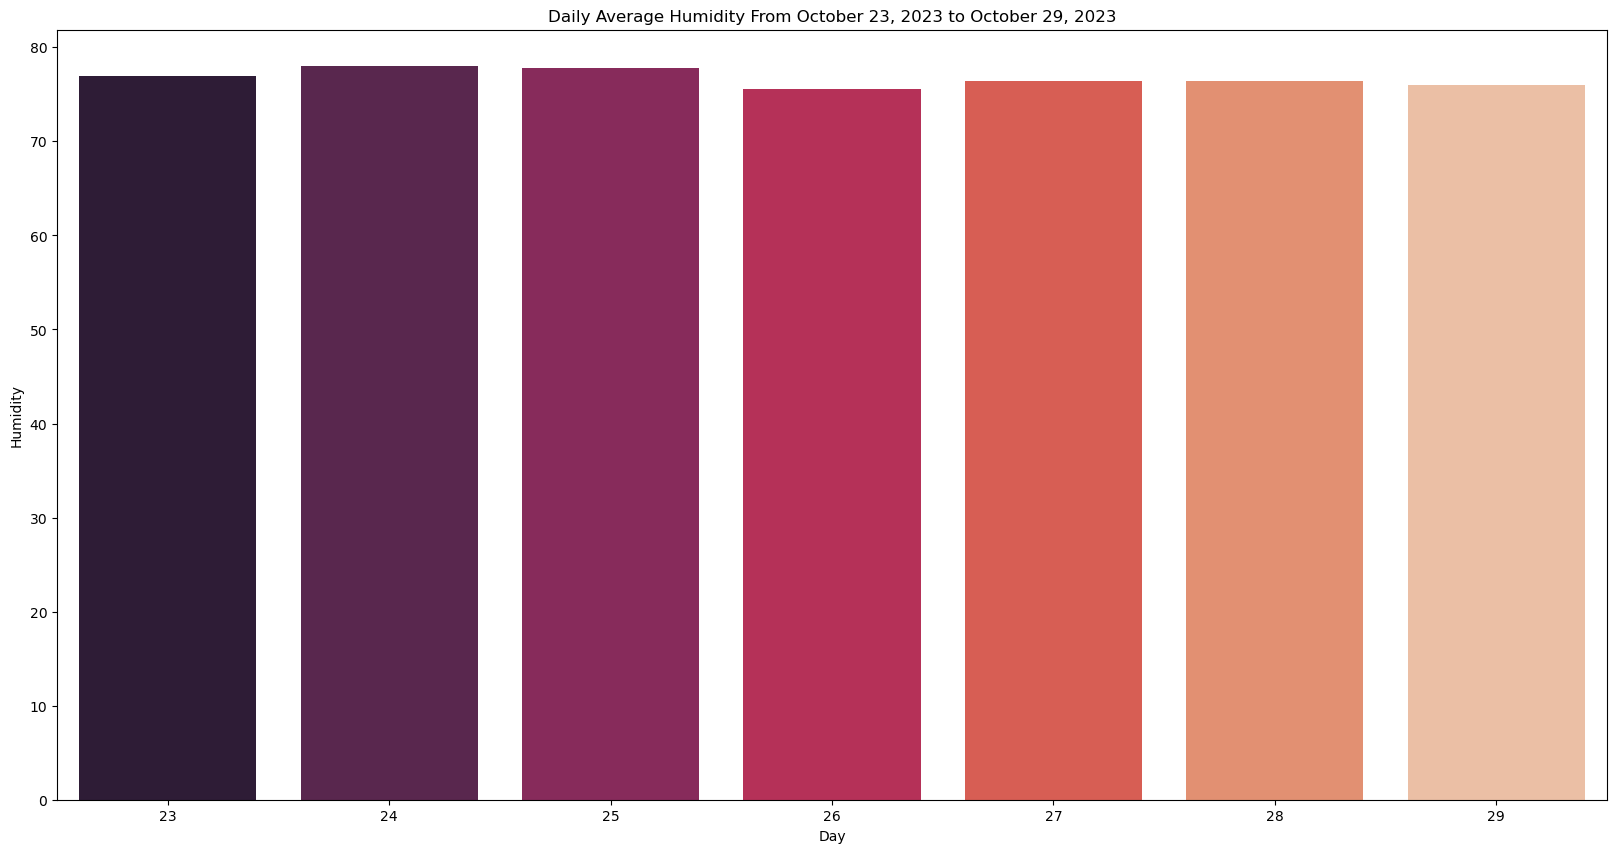

In [10]:
# Create a figure for the plot with a specific size
plt.figure(figsize=(20, 10))

# Set the title for the plot
plt.title("Daily Average Humidity From October 23, 2023 to October 29, 2023")

# Create a bar plot using Seaborn, specifying x and y data, and a color palette
sns.barplot(x=average_daily_humi['DateTime'], y=average_daily_humi['Humidity'], palette='rocket')

# Set the label for the x-axis
plt.xlabel("Day")


It can be observed that:

*   The average daily humidity ranges from 75.537  to 77.97
*   **October 23, 2023:** The average daily humidity on this day is approximately 76.95. This suggests that, on average, the humidity level was around 76.95% throughout the day.
*   **October 24, 2023:** The average daily humidity on this day is approximately 77.97. This indicates that the average humidity was slightly higher compared to the previous day, at around 77.97%.
*   **October 25, 2023:** The average daily humidity on this day is approximately 77.79. It's slightly lower than the previous day but still relatively high.

* **October 26, 2023:** The average daily humidity on this day is significantly lower, at approximately 75.54. This suggests that the day might have been drier or less humid compared to the previous days.

* **October 27, 2023:** The average daily humidity on this day is approximately 76.46, which is slightly higher than the day before but lower than the initial days.

* **October 28, 2023:** The average daily humidity on this day is approximately 76.42. It's similar to the humidity level on October 27, 2023.

* **October 29, 2023:** The average daily humidity on this day is approximately 75.99, which is similar to the humidity level on October 26, 2023.







In [11]:
# Calculate the average daily temperature
average_daily_temp = pd.DataFrame(df.groupby([df["DateTime"].dt.day])["Temperature"].mean())

# Reset the index to make the day column a regular column
average_daily_temp.reset_index(inplace=True)

average_daily_temp


,DateTime,Temperature
0,23,30.596154
1,24,30.694792
2,25,30.994737
3,26,30.641667
4,27,30.792473
5,28,30.651042
6,29,30.721978


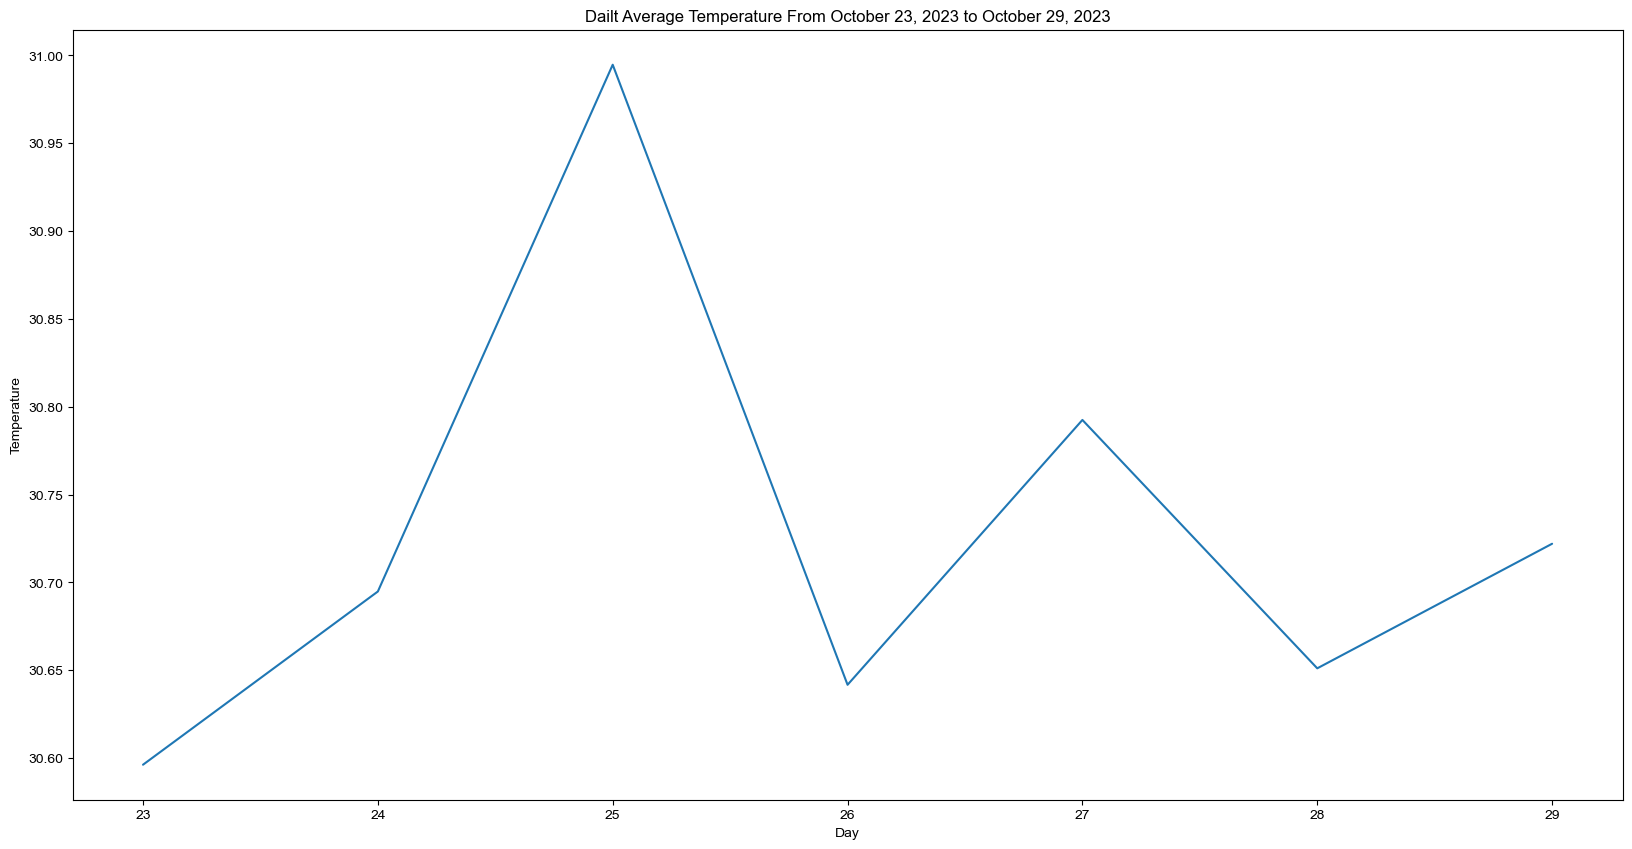

In [12]:
# Create the line plot
plt.figure(figsize=(20, 10))
plt.title("Dailt Average Temperature From October 23, 2023 to October 29, 2023")
sns.set_style("whitegrid")
# Use a lineplot from Seaborn
sns.lineplot(data=average_daily_temp, x=average_daily_temp['DateTime'], y=average_daily_temp['Temperature'])

plt.xlabel("Day")
plt.show()

It can be observed that on October 25, 2023 (Wednesday) was the hottest average daily temperature while October 23, 2023 has the lowest temperature among other days.

**Conclusion**

In conclusion, the study "Exploring Daily Temperature and Humidity Shifts in Malate, Manila" provides insights into the variations in daily humidity levels during the period from October 23, 2023, to October 29, 2023. Over this seven-day period, the average daily humidity ranged from 75.54% to 77.97%. Notably, October 26, 2023, stood out with significantly lower humidity, suggesting a drier or less humid day compared to the surrounding days. These findings highlight the dynamic nature of humidity in Malate, Manila, with variations that can influence the local climate and environmental conditions. Additionally, the study reveals temperature patterns during this time frame, with mean temperatures of 30.79°C in the afternoon, 30.76°C in the morning, and 30.67°C at night. The maximum recorded temperature reached 33.8°C, while the minimum temperatures varied from 23.6°C in the morning to 29.9°C in the afternoon and 24.9°C at night, demonstrating fluctuations in daily temperature throughout the week.